In [1]:
# Import Modules
import numpy as np # For Math
import pandas as pd # For Data Structures
import matplotlib as mpl # For Plotting Tools Library
import matplotlib.pyplot as plt # For Plotting
from pylab import cm # For Colors
import os # For interacting with Operating System


# import time as TIME
# import csv
# from astropy.timeseries import LombScargle
# from astropy.convolution import convolve, Box1DKernel
# from scipy.signal import medfilt
# import math

Opening F Type Stars


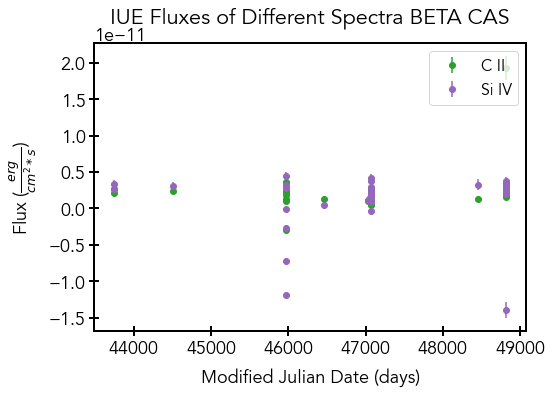

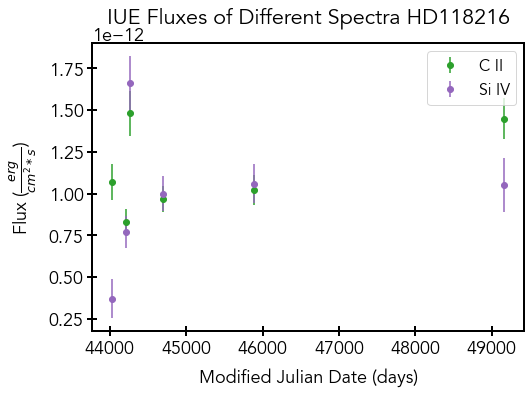

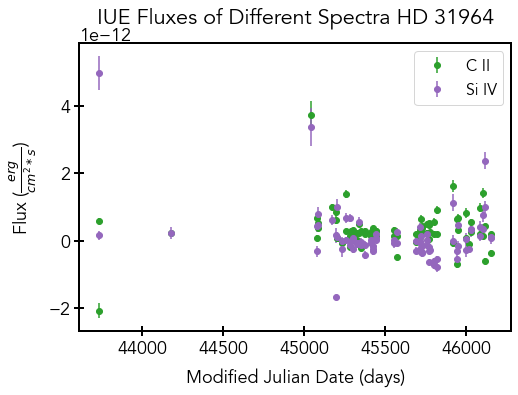

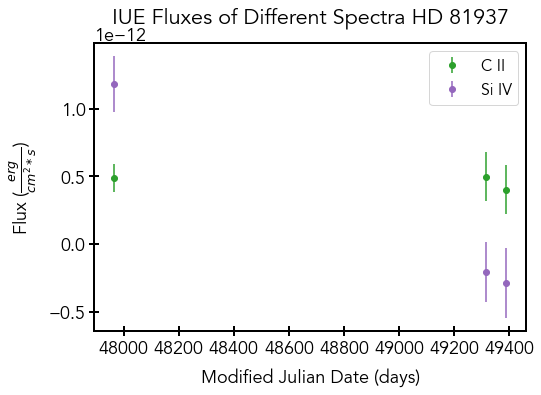

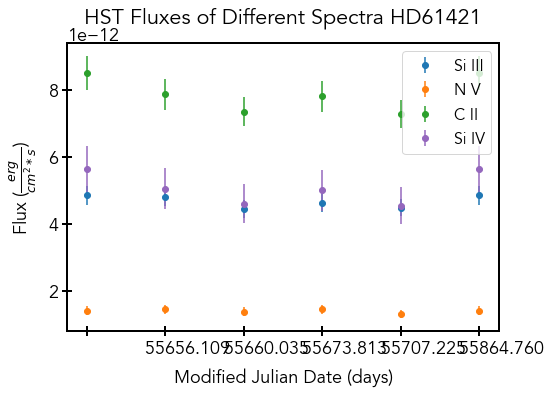

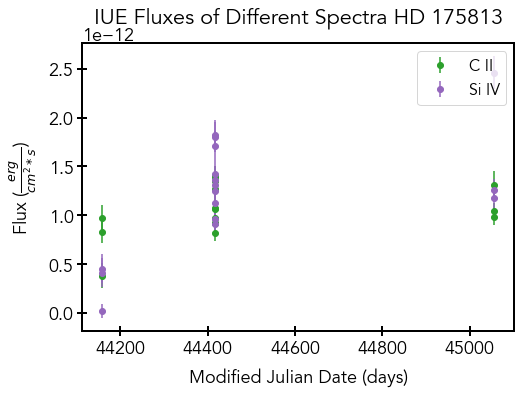

Opening G Type Stars


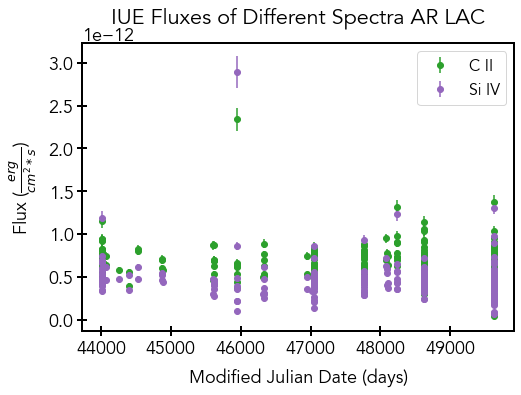

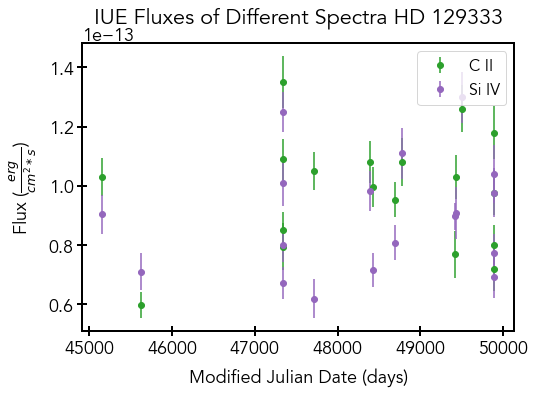

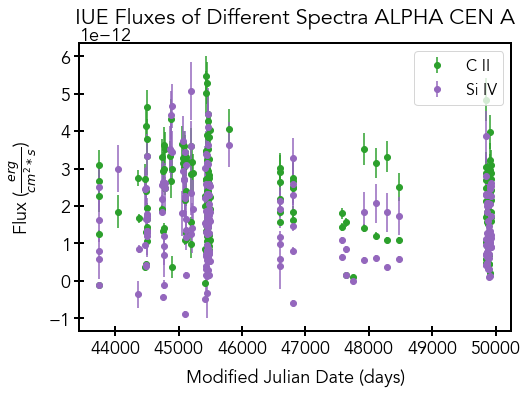

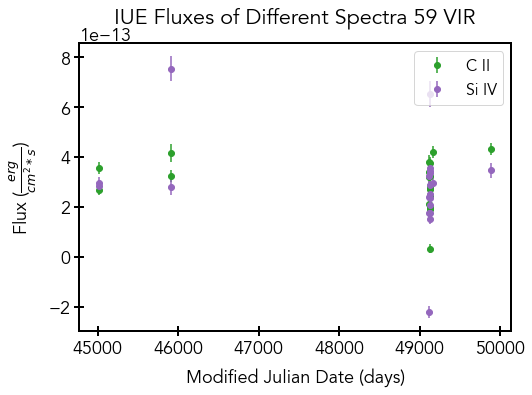

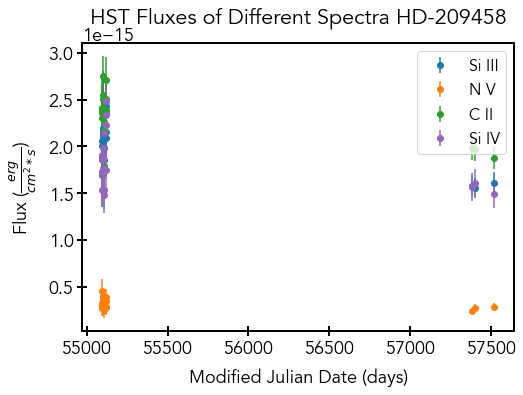

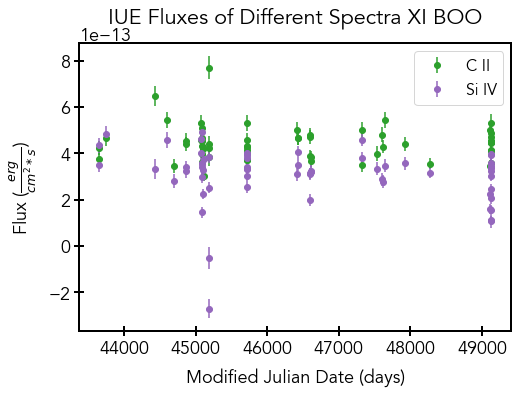

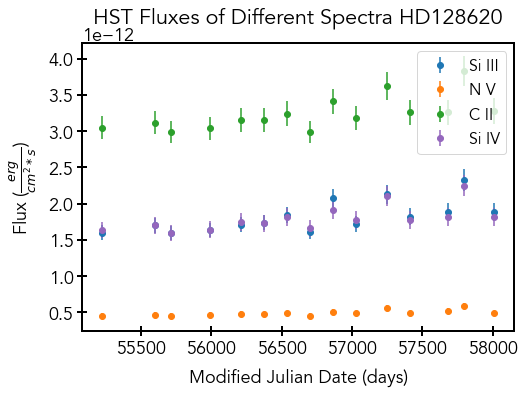

Opening K Type Stars


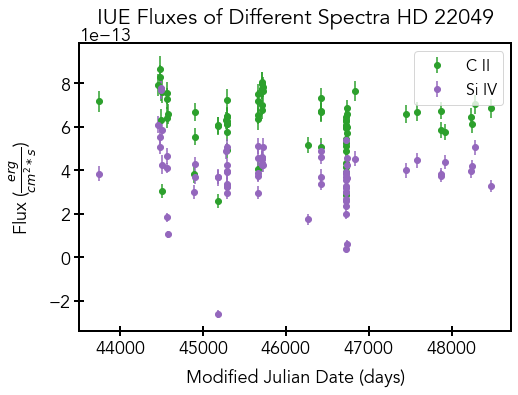

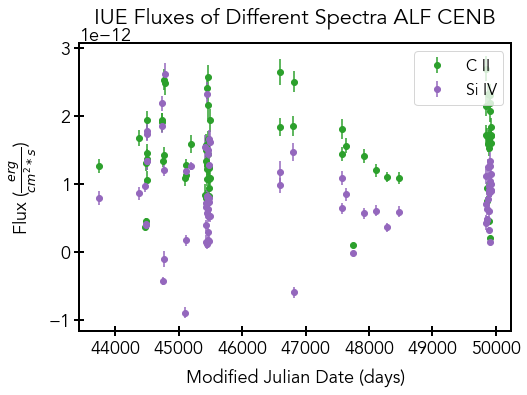

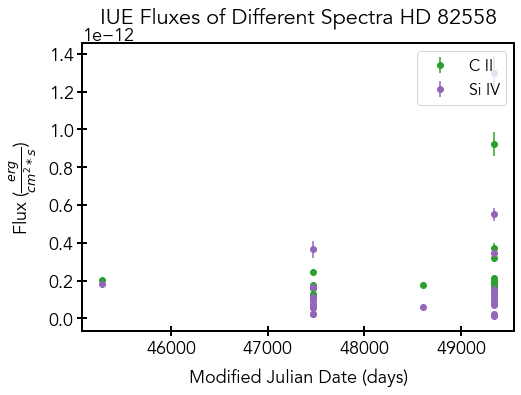

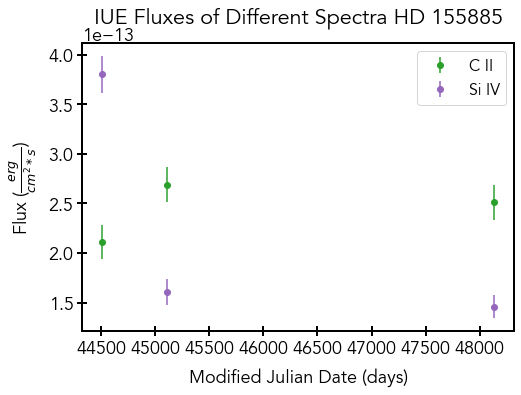

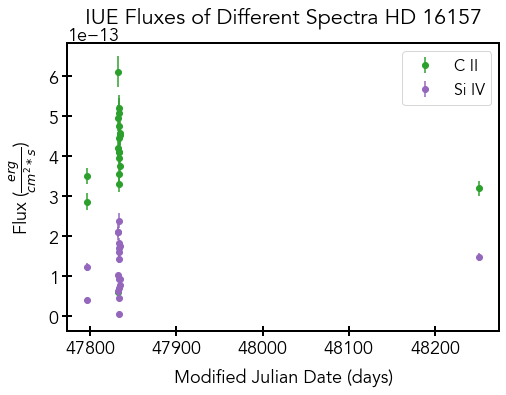

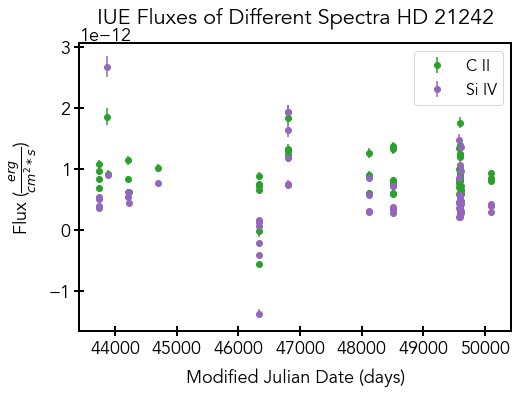

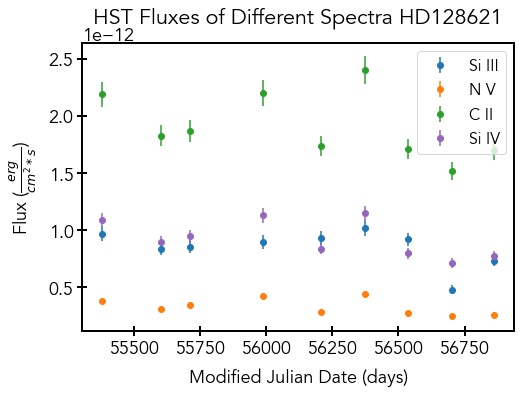

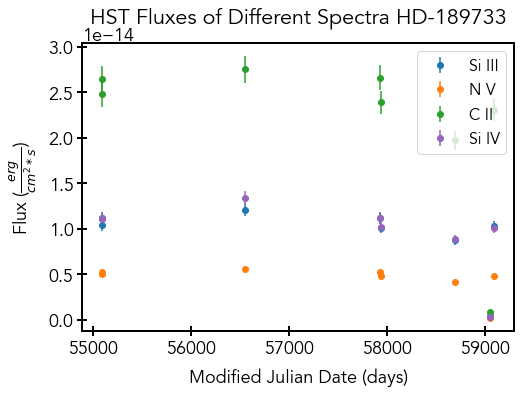

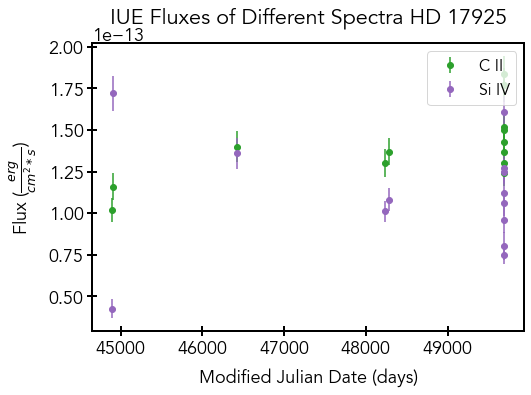

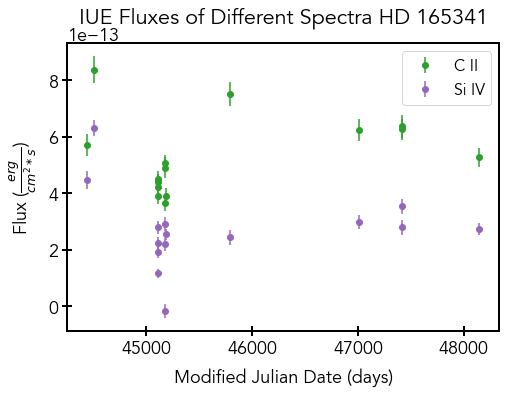

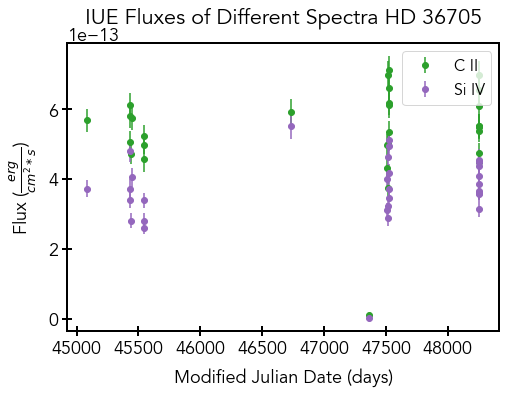

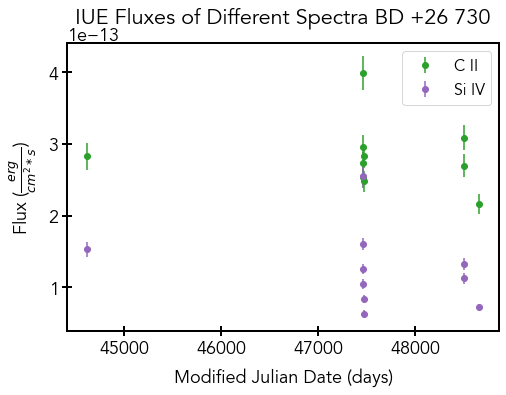

Opening M Type Stars


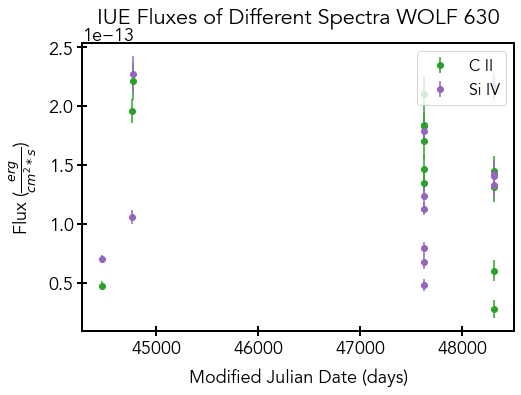

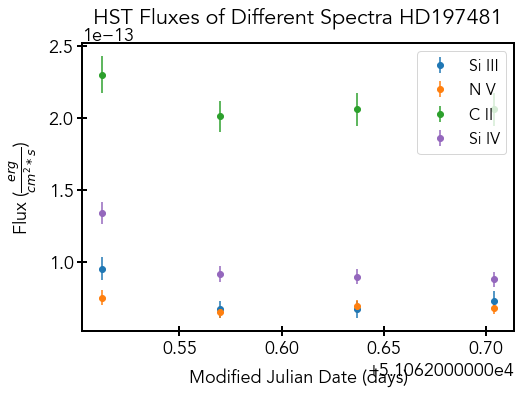

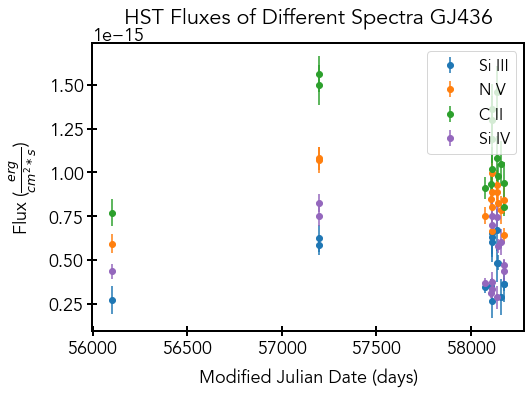

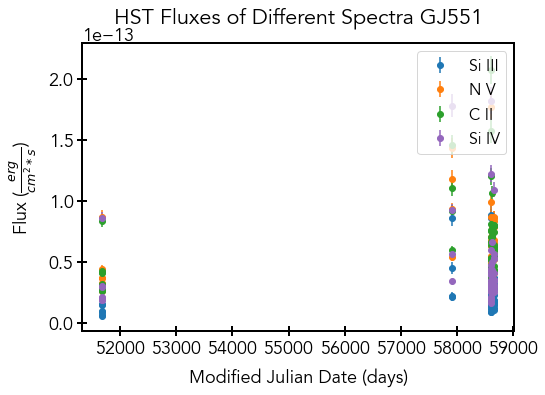

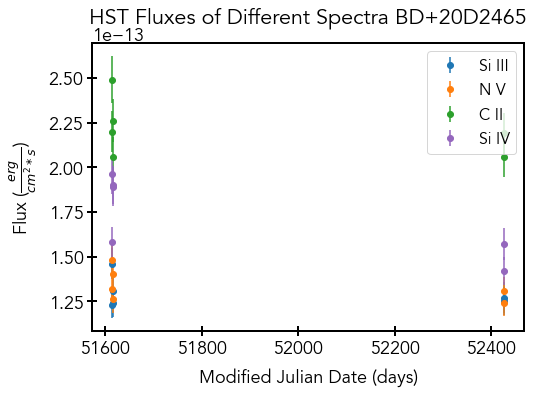

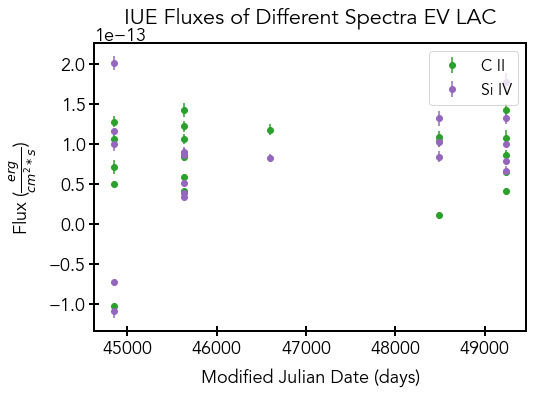

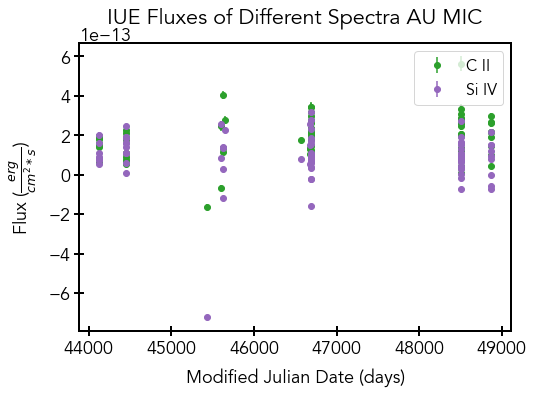

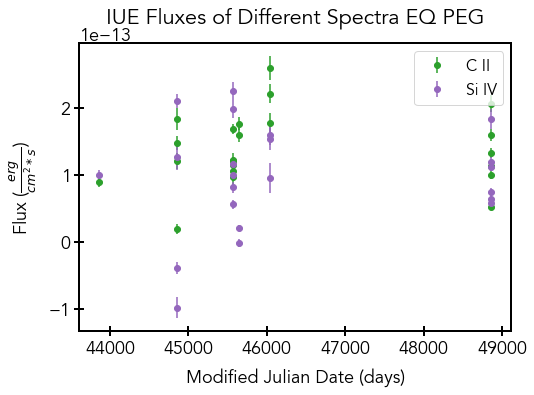

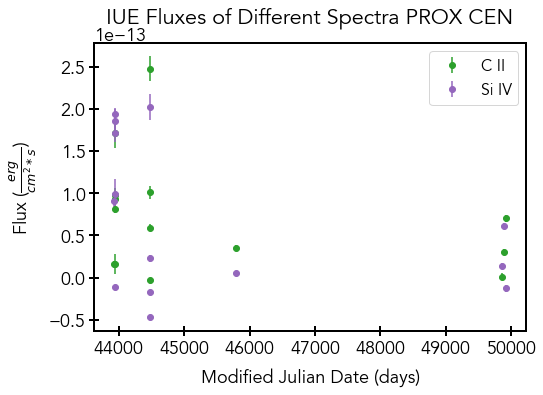

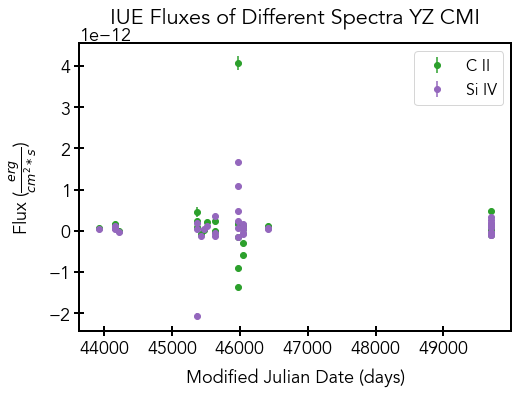

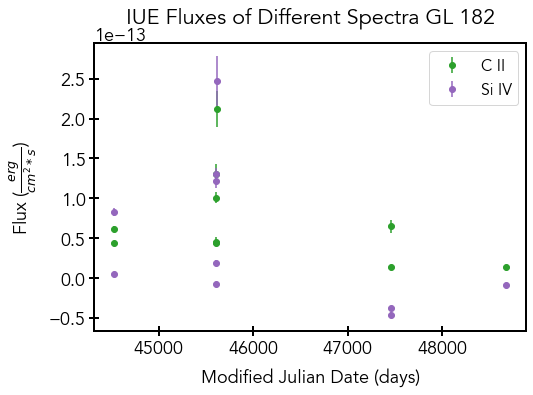

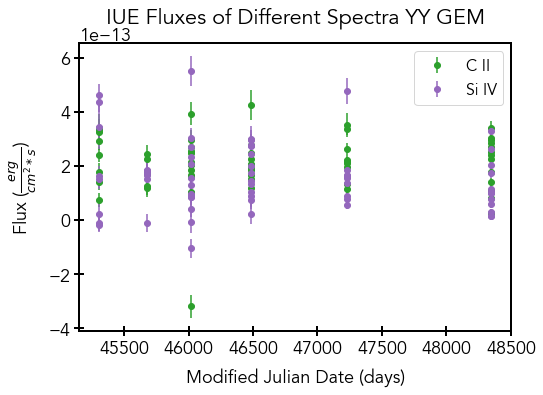

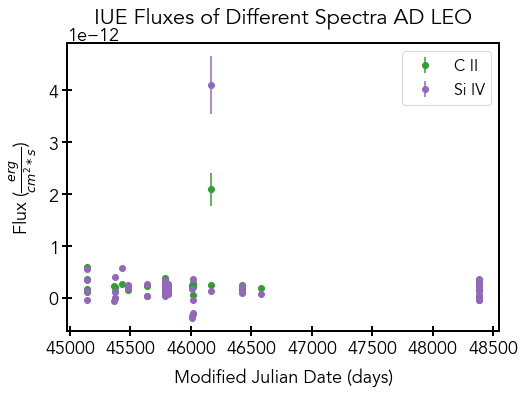

In [10]:
spec_types = ['F','G','K','M']

######################################################################################################################
# FILE READING #

# Repeats for all spectral types
for tp in spec_types:
    print('Opening ' + tp + ' Type Stars')
    data_folder = '/Users/leokamgar/jupyter/APPM 3310/RAW_DATA/' + tp + '_STARS/'
    # Opens all files within the spectral data folders
    for filename in os.listdir(data_folder):
        data_file = data_folder + filename
        
        # Reads data, if error, then prints and moves on to next file
        try:
            data = pd.read_csv(data_file)
        except Exception as e: 
            print(e)
            print('Error with reading: ' + filename + ' in ' + tp + ' type stars!')
            continue
        
        # Sorts data in ascending order by Time
        data = data.sort_values(by=['MJDstart'], axis=0, ascending=True)
        
        # Determines if from IUE or HST telescope
        if 'iue' in filename:
            iue = True
        else:
            iue = False
            
######################################################################################################################
# DATA RETRIEVAL #

        # Set arrays from data set
        time = data['MJDstart']
        flux_Si3 = data[' F(Si3)']
        error_Si3 = data['  E(Si3)']
        background_Si3 = data['  B(Si3)']
        flux_N5 = data['  F(N5)']
        error_N5 = data['  E(N5)']
        background_N5 = data['  B(N5)']
        flux_C2 = data['  F(C2)']
        error_C2 = data['  E(C2)']
        background_C2 = data['  B(C2)']
        flux_Si4 = data['  F(Si4)']
        error_Si4 = data['  E(Si4)']
        background_Si4 = data['  B(Si4)']
        col_name = data['Targname']
        
######################################################################################################################
# DATA CLEANUP #

        # Cleans up name of star
        name = col_name[1].strip()
        # Converts Julien Date (What IUE Data Represented As) to Modified Julian Date
        if iue:
            time = time - 2400000.5
            
######################################################################################################################
# PLOTTING #
    
        mpl.rcParams['font.family'] = 'Avenir'
        plt.rcParams['font.size'] = 18
        plt.rcParams['axes.linewidth'] = 2
        colors = cm.get_cmap('tab10', 8)

        # Create figure and add axes object
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1])
        fig.patch.set_facecolor('#ffffff')

        if not iue:
            ax.errorbar(time, flux_Si3, yerr=error_Si3, fmt='o', color=colors(0), label = r'Si III')
            ax.errorbar(time, flux_N5, yerr=error_N5, fmt='o', color=colors(1), label = r'N V')
        ax.errorbar(time, flux_C2, yerr=error_C2, fmt='o', color=colors(2), label = r'C II')
        ax.errorbar(time, flux_Si4, yerr=error_Si4, fmt='o', color=colors(3), label = r'Si IV')

        ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='inout')
        ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='inout')
        ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='inout')
        ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='inout')

        if iue:
            ax.set_title('IUE Ion Fluxes of ' + name, y=1.05)
        else:
            ax.set_title('HST Ion Fluxes of ' + name, y=1.05)
        ax.set_xlabel('Modified Julian Date (days)', labelpad=10)
        ax.set_ylabel('Flux ($\\frac{erg}{cm^2 * s}$)', labelpad=10)

        ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=True, fontsize=16)
        
        plt.show()

######################################################################################################################
# Fast Fourier Transform to Compare #

#             # Lomb Scargle Data Sifting
#         for p_star_name in p_star_names:
#             if name in p_star_name:
#                 if (iue and 'IUE' in p_star_name) or (not iue and 'HST' in p_star_name):
#                     if iue:
#                         print(name + ": IUE")
#                     else:
#                         print(name + ": HST")
#                     # Structure: [star][x data set (Time for one of the ions)]
#                     p_x_data.append([name, "IUE" if iue else "HST" ,time_Si3,time_N5,time_C2,time_Si4])
#                     p_y_data.append([name, "IUE" if iue else "HST" ,f_f_Si3,f_f_N5,f_f_C2,f_f_Si4])

######################################################################################################################
# Wavelet Transform #

In [ ]:
# Input Parameters:
spec_types = ['F','G','K','M']
star_stats_dir = '/Users/leokamgar/jupyter/LASP/Star_Properties'
star_stats_file = star_stats_dir + '/Star_Properties.csv'
periodicity_stats_dir = '/Users/leokamgar/jupyter/LASP/Star_Properties/Periodicity_Stats'
norm_save = True # Set to True to save normal plot
spec_save = False # Set to True to save broken plot
stat_save = True # Decides whether to save to Star Statistics File
prop_save = True # Decides whether to save to Star Properties File
show_plots = True # Decides whether to show plots or not. !!! IF NOT SHOWING PLOTS, CANNOT SAVE PLOTS !!!
co_factor = 1 # Sets Cutoff Factor for eliminating outlier data points
F_co_factor = 1.3 # Sets Cutoff Factor for F Type Stars
p_star_names = ['IUE_* alf Cen B','IUE_* eps Eri','IUE_* ksi Boo','HST_* alf Cen A','HST_* alf Cen B'] # Star names
# for Lomb Scargle Periodogram analysis. Telescope name comes first, followed by a _ and then the star name
p_x_data = [] # Arrays for the x data for the periodograms
p_y_data = [] # Arrays for the y data for the periodograms

for tp in spec_types:
    print('Beginning ' + tp + ' type stars!!!')
    in_folder = '/Users/leokamgar/jupyter/LASP/VARIABILITY/' + tp + '_STARS/DATA_OUT/'
    plot_results_dir = '/Users/leokamgar/jupyter/LASP/' + tp + '_STARS_DATA/' + tp + '_STARS_Plots/'
    stat_results_dir = '/Users/leokamgar/jupyter/LASP/' + tp + '_STARS_DATA/' + tp + '_STARS_Stats/'
    star_stats_file = star_stats_dir + '/Star_Properties.csv'
    temp_star_stats_file = star_stats_dir + '/Star_Properties_Temp.csv'
    s_type = tp
    timeCounter = 0 # So every 5 queries we take 5 seconds break
    for filename in os.listdir(in_folder):
        timeCounter = timeCounter + 1
        if timeCounter % 5 == 0: # Every 5 queries take 5 seconds break so IP wont get blacklisted
            TIME.sleep(5)
        in_file = in_folder + filename
        
        try:
            data = pd.read_csv(in_file)
        except:
            print('Error with reading: ' + filename + ' in ' + tp + ' type stars!')
            continue
      
        ##############################################################################################################
        
        if not os.path.isdir(plot_results_dir):
            os.makedirs(plot_results_dir)
        if not os.path.isdir(stat_results_dir):
            os.makedirs(stat_results_dir)
        if not os.path.isdir(star_stats_dir):
            os.makedirs(star_stats_dir)
        if not os.path.isdir(periodicity_stats_dir):
            os.makedirs(periodicity_stats_dir)
        with open(star_stats_file, 'a') as my_new_csv_file:
            pass

        ##############################################################################################################

        # Reorder data in ascending time order
        data = data.sort_values(by=['MJDstart'], axis=0, ascending=True)
        if 'iue' in filename:
            iue = True
        else:
            iue = False

        ##############################################################################################################

        # Set Variables From Data
        time = data['MJDstart']
        f_Si3 = data[' F(Si3)']
        e_Si3 = data['  E(Si3)']
        b_Si3 = data['  B(Si3)']
        f_N5 = data['  F(N5)']
        e_N5 = data['  E(N5)']
        b_N5 = data['  B(N5)']
        f_C2 = data['  F(C2)']
        e_C2 = data['  E(C2)']
        b_C2 = data['  B(C2)']
        f_Si4 = data['  F(Si4)']
        e_Si4 = data['  E(Si4)']
        b_Si4 = data['  B(Si4)']
        col_name = data['Targname']

######################################################################################################################

        #
        #
        # Name cleanup/BV & Temperature SIMBAD Query
        name = col_name[1].strip() # Cleans up name of star

######################################################################################################################

        #
        #
        # Time Cleanup
        if iue: # Converts Julien Date to Modified Julian Date
            time = time - 2400000.5

        #
        #
        # Data cuts and eliminations via a given criteria
        if s_type != 'F':
            mod_f_Si3 = np.where(((f_Si3 - e_Si3) > (co_factor * b_Si3)) & (b_Si3 > 0) & (f_Si3 > 0.2 * np.mean(f_Si3)), f_Si3, 0)
            mod_f_N5 = np.where(((f_N5 - e_N5) > (co_factor * b_N5)) & (b_N5 > 0) & (f_N5 > 0.2 * np.mean(f_N5)), f_N5, 0)
            mod_f_C2 = np.where(((f_C2 - e_C2) > (co_factor * b_C2)) & (b_C2 > 0) & (f_C2 > 0.2 * np.mean(f_C2)), f_C2, 0)
            mod_f_Si4 = np.where(((f_Si4 - e_Si4) > (co_factor * b_Si4)) & (b_Si4 > 0) & (f_Si4 > 0.2 * np.mean(f_Si4)), f_Si4, 0)
        else:
            mod_f_Si3 = np.where(((f_Si3 + b_Si3 - e_Si3) > (F_co_factor * b_Si3)) & (b_Si3 > 0) & (f_Si3 > 0.2 * np.mean(f_Si3)), f_Si3, 0)
            mod_f_N5 = np.where(((f_N5 + b_N5 - e_N5) > (F_co_factor * b_N5)) & (b_N5 > 0) & (f_N5 > 0.2 * np.mean(f_N5)), f_N5, 0)
            mod_f_C2 = np.where(((f_C2 + b_C2 - e_C2) > (F_co_factor * b_C2)) & (b_C2 > 0) & (f_C2 > 0.2 * np.mean(f_C2)), f_C2, 0)
            mod_f_Si4 = np.where(((f_Si4 + b_Si4 - e_Si4) > (F_co_factor * b_Si4)) & (b_Si4 > 0) & (f_Si4 > 0.2 * np.mean(f_Si4)), f_Si4, 0)
        f_f_Si3 = []
        f_f_N5 = []
        f_f_C2 = []
        f_f_Si4 = []
        f_e_Si3 = []
        f_e_N5 = []
        f_e_C2 = []
        f_e_Si4 = []
        time_Si3 = []
        time_N5 = []
        time_C2 = []
        time_Si4 = []
        for i in range(len(mod_f_Si3)):
            if str(time[i]) == '  ': continue
            if mod_f_Si3[i] != 0:
                f_f_Si3.append(mod_f_Si3[i])
                f_e_Si3.append(e_Si3[i])
                time_Si3.append(float(time[i]))
        for i in range(len(mod_f_N5)):
            if str(time[i]) == '  ': continue
            if mod_f_N5[i] != 0:
                f_f_N5.append(mod_f_N5[i])
                f_e_N5.append(e_N5[i])
                time_N5.append(float(time[i]))
        for i in range(len(mod_f_C2)):
            if str(time[i]) == '  ': continue
            if mod_f_C2[i] != 0:
                f_f_C2.append(mod_f_C2[i])
                f_e_C2.append(e_C2[i])
                time_C2.append(float(time[i]))
        for i in range(len(mod_f_Si4)):
            if str(time[i]) == '  ': continue
            if mod_f_Si4[i] != 0:
                f_f_Si4.append(mod_f_Si4[i])
                f_e_Si4.append(e_Si4[i])
                time_Si4.append(float(time[i]))
######################################################################################################################
        def greekify(name):
            greekName = name
            greekName = greekName.replace("alf", r'$\alpha$')
            greekName = greekName.replace("bet", r'$\beta$')
            greekName = greekName.replace("eps", r'$\epsilon$')
            greekName = greekName.replace("ksi", r'$\xi$')
            return greekName
    
    # Lomb Scargle Data Sifting
        for p_star_name in p_star_names:
            if name in p_star_name:
                if (iue and 'IUE' in p_star_name) or (not iue and 'HST' in p_star_name):
                    if iue:
                        print(name + ": IUE")
                    else:
                        print(name + ": HST")
                    # Structure: [star][x data set (Time for one of the ions)]
                    p_x_data.append([name, "IUE" if iue else "HST" ,time_Si3,time_N5,time_C2,time_Si4])
                    p_y_data.append([name, "IUE" if iue else "HST" ,f_f_Si3,f_f_N5,f_f_C2,f_f_Si4])
                
######################################################################################################################  
        if show_plots:
            mpl.rcParams['font.family'] = 'Avenir'
            plt.rcParams['font.size'] = 18
            plt.rcParams['axes.linewidth'] = 2
            colors = cm.get_cmap('tab10', 8)

            # Create figure and add axes object
            fig = plt.figure()
            ax = fig.add_axes([0, 0, 1, 1])
            fig.patch.set_facecolor('#ffffff')
            
            if not iue:
                ax.errorbar(time_Si3, f_f_Si3, yerr=f_e_Si3, fmt='o', color=colors(0), label = r'Si III')
                ax.errorbar(time_N5, f_f_N5, yerr=f_e_N5, fmt='o', color=colors(1), label = r'N V')
            ax.errorbar(time_C2, f_f_C2, yerr=f_e_C2, fmt='o', color=colors(2), label = r'C II')
            ax.errorbar(time_Si4, f_f_Si4, yerr=f_e_Si4, fmt='o', color=colors(3), label = r'Si IV')

            ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='inout')
            ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='inout')
            ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='inout')
            ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='inout')
            
            if iue:
                ax.set_title('IUE Fluxes of Different Spectra ' + greekify(name), y=1.05)
            else:
                ax.set_title('HST Fluxes of Different Spectra ' + greekify(name), y=1.05)
            ax.set_xlabel('Modified Julian Date (days)', labelpad=10)
            ax.set_ylabel('Flux ($\\frac{erg}{cm^2 * s}$)', labelpad=10)

            ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=True, fontsize=16)

#             plt.show()

            #save plot
            if norm_save == True:
                if not iue:
                    plt.savefig(plot_results_dir + name + '_HST_Flux_Plot.png', transparent=False, bbox_inches='tight')
                else:
                    plt.savefig(plot_results_dir + name + '_IUE_Flux_Plot.png', transparent=False, bbox_inches='tight')
                    
            plt.show()

######################################################################################################################

        # Edit filename of statistical data depending on HST or IUE data
        if not iue:
            final_stat_loc = stat_results_dir + name + '_HST_Stats.csv'
        else:
            final_stat_loc = stat_results_dir + name + '_IUE_Stats.csv'

        # If empty, fill with a single 0.
        if len(f_f_Si3) == 0:
            f_f_Si3.append(0)
        if len(f_f_N5) == 0:
            f_f_N5.append(0)
        if len(f_f_C2) == 0:
            f_f_C2.append(0)
        if len(f_f_Si4) == 0:
            f_f_Si4.append(0)

        # 1st order statistical calculation variables
        u_Si3 = np.mean(f_f_Si3)
        u_N5 = np.mean(f_f_N5)
        u_C2 = np.mean(f_f_C2)
        u_Si4 = np.mean(f_f_Si4)
        o_Si3 = np.std(f_f_Si3)
        o_N5 = np.std(f_f_N5)
        o_C2 = np.std(f_f_C2)
        o_Si4 = np.std(f_f_Si4)
        x_Si3 = max(f_f_Si3)
        x_N5 = max(f_f_N5)
        x_C2 = max(f_f_C2)
        x_Si4 = max(f_f_Si4)
        n_Si3 = min(f_f_Si3)
        n_N5 = min(f_f_N5)
        n_C2 = min(f_f_C2)
        n_Si4 = min(f_f_Si4)

        # 2nd order statistical calculation variables, aka the relative statistical data
        if u_Si3 != 0:
            or_Si3 = o_Si3 / u_Si3
            xr_Si3 = x_Si3 / u_Si3
            nr_Si3 = n_Si3 / u_Si3
        else:
            or_Si3 = 0
            xr_Si3 = 0
            nr_Si3 = 0
        if u_N5 != 0:
            or_N5 = o_N5 / u_N5
            xr_N5 = x_N5 / u_N5
            nr_N5 = n_N5 / u_N5
        else:
            or_N5 = 0
            xr_N5 = 0
            nr_N5 = 0
        if u_C2 != 0:
            or_C2 = o_C2 / u_C2
            xr_C2 = x_C2 / u_C2
            nr_C2 = n_C2 / u_C2
        else:
            or_C2 = 0
            xr_C2 = 0
            nr_C2 = 0
        if u_Si4 != 0:
            or_Si4 = o_Si4 / u_Si4
            xr_Si4 = x_Si4 / u_Si4
            nr_Si4 = n_Si4 / u_Si4
        else:
            or_Si4 = 0
            xr_Si4 = 0
            nr_Si4 = 0

        tot_stat_data = pd.DataFrame(np.array([[u_Si3, o_Si3, x_Si3, n_Si3, or_Si3, xr_Si3, nr_Si3], 
                                                [u_N5, o_N5, x_N5, n_N5, or_N5, xr_N5, nr_N5], 
                                                [u_C2, o_C2, x_C2, n_C2, or_C2, xr_C2, nr_C2],
                                                [u_Si4, o_Si4, x_Si4, n_Si4, or_Si4, xr_Si4, nr_Si4]]),
                                 index=['F(Si3)','F(N5)','F(C2)','F(Si4)'],
                                columns=['Mean','Standard Deviation', 'Maximum', 'Minimum','Rel. Standard Deviation', 'Rel. Maximum', 'Rel. Minimum'])

######################################################################################################################

        if stat_save:
            tot_stat_data.to_csv(path_or_buf=final_stat_loc,sep=',',index=True)
        if prop_save:
            #
            #
            # Adds Star Property Data to the Star_Properties.csv file located in the Star_Properties folder
            append_star_data = True
            s_prop_indices = ['Main ID',
                              'B Magnitude',
                              'V Magnitude',
                              'Simbad T_eff',
                              'Alt T_eff',
                              'Alt Ref',
                              'Prot',
                              'logRpHK']
            star_prop_filesize = 0
            for row in open(star_stats_file): # Gets # of rows in the star properties file
                star_prop_filesize += 1

            in_data = [name, b_mag, v_mag, sim_temp, 0, 0,'--','--']
            with open(star_stats_file) as inf, open(temp_star_stats_file, 'w') as outf:
                reader = csv.reader(inf)
                writer = csv.writer(outf)    
                if star_prop_filesize != 0:
                    for line in reader:
                        if line[0] == name:
                            writer.writerow(in_data)
                            append_star_data = False
                            break
                        else:
                            writer.writerow(line)
                    writer.writerows(reader)
                else:
                    writer.writerow(s_prop_indices)
                if append_star_data:
                    writer.writerow(in_data)
                inf.close()
                outf.close()
            os.remove(star_stats_file) # Removes old Star_Properties.csv
            os.rename(temp_star_stats_file, star_stats_file) # Replaces Star_Properties.csv with the file at the temp path

######################################################################################################################

